# Ensemble Methods

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alinaali/Data_Science_and_Machine_Learning/blob/main/Supervised%20Learning/Ensemble_Learning/Ensemble_Learning.ipynb)

## Bagging

Bagging is the process of sub-sampling training data to improve the generalization performance of a single type of classifier. This technique is effective on models which tend to overfit the dataset.

The method used to sub-sample the data is bootstrapping (the name bagging comes from bootstrap + aggregating). This method consists of doing random sampling with replacement over the data, which means that the subsets of the training data will overlap since we are not splitting the data but resampling it.

Once obtained the output of each of the models, the final prediction for each data can be obtained by doing regression voting, where predictions are the average of contributing models, or classification voting, where predictions are the majority vote of contributing models.



 ---

<p align="center">
    <img src="Bagging.png" width="700" hight ="800">
</p>

---



# Advantages and Disadvantages of Bagging

Below given are the top advantages and disadvantages.

## Advantages of Bagging

- The biggest advantage of bagging is that multiple weak learners can work better than a single strong learner.
- It provides stability and increases the machine learning algorithm’s accuracy that is used in statistical classification and regression.
- It helps in reducing variance, i.e. it avoids overfitting.

## Disadvantages of Bagging

- It may result in high bias if it is not modelled properly and thus may result in underfitting.
- Since we must use multiple models, it becomes computationally expensive and may not be suitable in various use cases.

## Data 
The Penguins dataset is used to implement and train this algorithm 


## Libraries/Packages: 
The first step is to import libraries. 

- Import Numpy
- Import Pandas
- Import Matplotlib
- Import Seaborn
- Import Plot Decision Regions
- Import DecisionTreeClassifier
- Import BaggingClassifier
- Import classification_report
- Import train_test_split

## Importing Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Data PreProcessing and Visualization

In [2]:
#I am dropping all the rows that contain NaN values in this Penguins dataset.
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


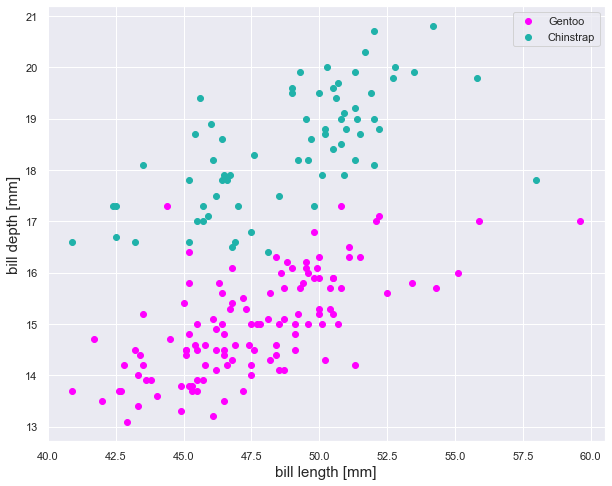

In [3]:
# After I run this cell, I was getting an error saying the input values contains nan values then
# I rerun the dropna function to remove those nan values. 
penguins = penguins.iloc[6:]

X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()
max_X = np.max(X)
X = X /max_X

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
    
        
# Create target value array
y = penguins["species"].map(make_labels).to_numpy()


# Plot the data
species1 = ["Gentoo", "Chinstrap"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(species1, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()


# Train-Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


# Comparing Decision Tree with Bagging

## Predicting & Visualizing the test results

Here, I am comparing the Decision Tree Classifier with Bagging Classifier. 

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 100,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.96      0.98        46

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.93      0.97        46

    accuracy                           0.96        75
   macro avg       0.95      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75
 



From above results, it shows the accuracy using Decision Tree is 97% and accuracy using Bagging is 96%. The results are pretty much same. 

# Plotting Decision Regions for Decision Tree and Bagging 

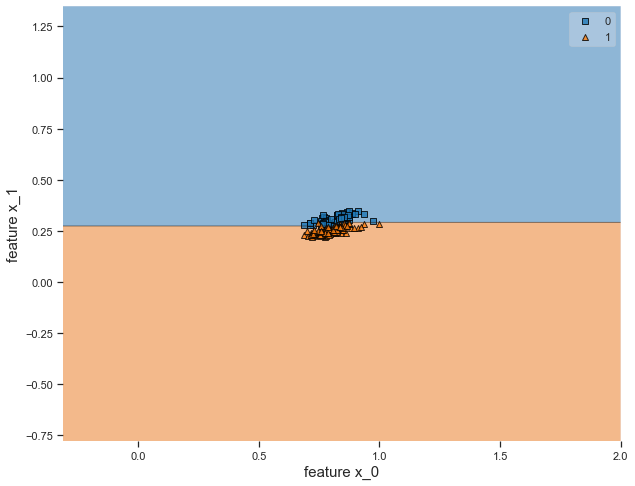

In [50]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

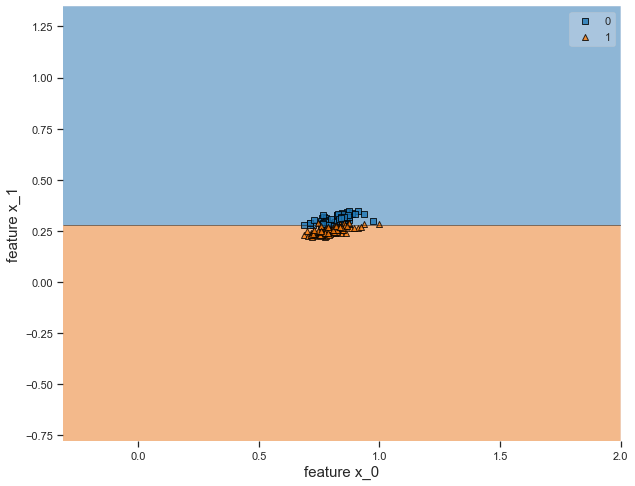

In [51]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

# Random Forest

A random forest is a machine learning technique that’s used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.

The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

A random forest eradicates the limitations of a decision tree algorithm. It reduces the overfitting of datasets and increases precision. It generates predictions without requiring many configurations in packages (like scikit-learn).


 ---

<p align="center">
    <img src="Random_Forest.png" width="700" hight ="800">
</p>

---



# Features of a Random Forest Algorithm

- It’s more accurate than the decision tree algorithm.
- It provides an effective way of handling missing data.
- It can produce a reasonable prediction without hyper-parameter tuning.
- It solves the issue of overfitting in decision trees.
- In every random forest tree, a subset of features is selected randomly at the node’s splitting point.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth =1 , n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.95      0.94      0.95       101

    accuracy                           0.92       131
   macro avg       0.88      0.89      0.88       131
weighted avg       0.92      0.92      0.92       131
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.87      0.43      0.58        30
           1       0.85      0.98      0.91       101

    accuracy                           0.85       131
   macro avg       0.86      0.71      0.75       131
weighted avg       0.86      0.85      0.84       131
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.87      0.43      0.58        30
           1       0.85      0.98      0.91       101

    accuracy                           0.85       131
   macro avg       0.86      0.71     

After looking at the above classification report for all three algorithms, the Decision Tree has highest acuracy. 

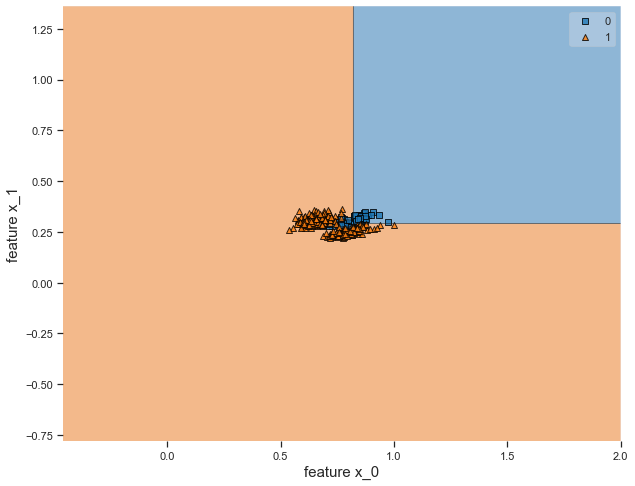

In [10]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

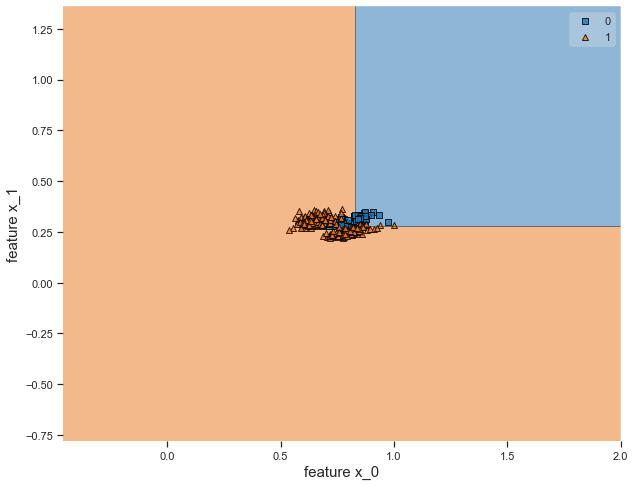

In [11]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

c:\Users\alina\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


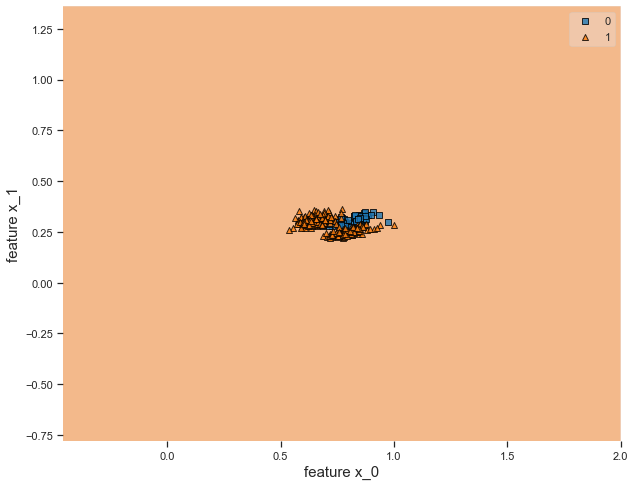

In [15]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

# Error Analysis

I am not sure why the Random Forest doesnot differentiate the decision regions.

In [17]:
from sklearn.ensemble import RandomForestClassifier

X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.98      0.99      0.98        98

    accuracy                           0.98       131
   macro avg       0.97      0.96      0.97       131
weighted avg       0.98      0.98      0.98       131
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.75      1.00      0.86        98

    accuracy                           0.75       131
   macro avg       0.37      0.50      0.43       131
weighted avg       0.56      0.75      0.64       131
 



c:\Users\alina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Forest Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.75      1.00      0.86        98

    accuracy                           0.75       131
   macro avg       0.37      0.50      0.43       131
weighted avg       0.56      0.75      0.64       131
 



c:\Users\alina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Feature Importance

Random forests is that these models make it simple to measure feature importance of each feature. Scikit-Learn does this by measuring a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average across all trees in the forest. 


In [19]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.334
bill_depth_mm 0.324
flipper_length_mm 0.342


Almost all three features are having same importance ranging from 0.324 to 0.342. In all three, the flipper length has highest importance.